# Multiple Linear Regression

## Introduction

The goal of this notebook is to use linear regression from sklearn and my own implementation to predict the sales of a product depending on the advertising platform.


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading data

In [7]:
# read the dataset
filepath = 'data/AdvertisingSales.csv'
advertising_data = pd.read_csv(filepath, index_col=0)

# rename the columns (easier to read)
advertising_data.rename(columns={'TV Ad Budget ($)':'TV',
                                 'Radio Ad Budget ($)':'Radio',
                                 'Newspaper Ad Budget ($)':'Newspaper',
                                 'Sales ($)':'Sales'}, inplace=True)

# Take a look to the data set
advertising_data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [8]:
# some stats on the dataset
advertising_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### Visualising the data

Plot each feature according to the sales

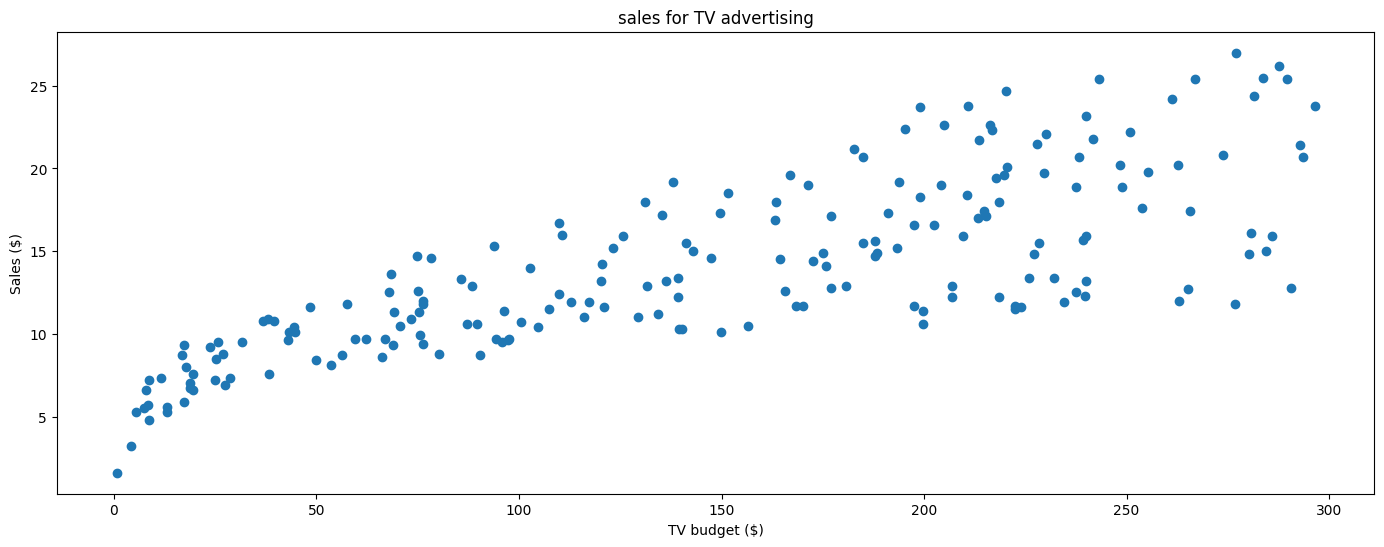

In [9]:
plt.figure(figsize=(17, 6))
plt.title('sales for TV advertising')
plt.xlabel('TV budget ($)')
plt.ylabel('Sales ($)')
plt.scatter(x=advertising_data.TV, y=advertising_data.Sales)

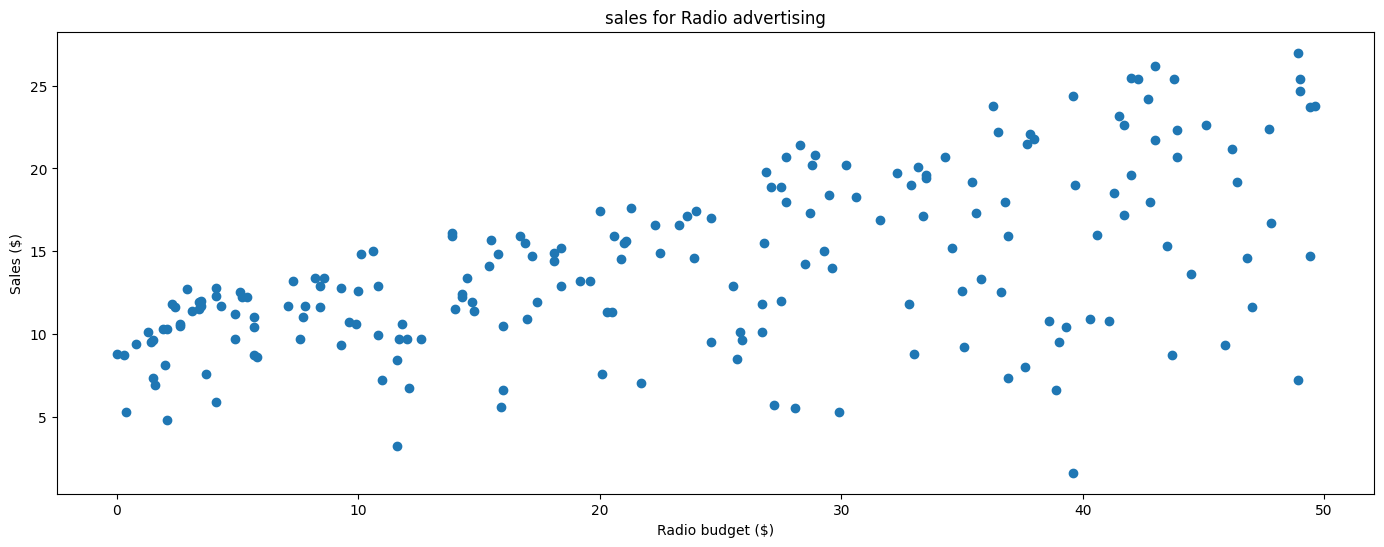

In [10]:
plt.figure(figsize=(17, 6))
plt.title('sales for Radio advertising')
plt.xlabel('Radio budget ($)')
plt.ylabel('Sales ($)')
plt.scatter(x=advertising_data.Radio, y=advertising_data.Sales)

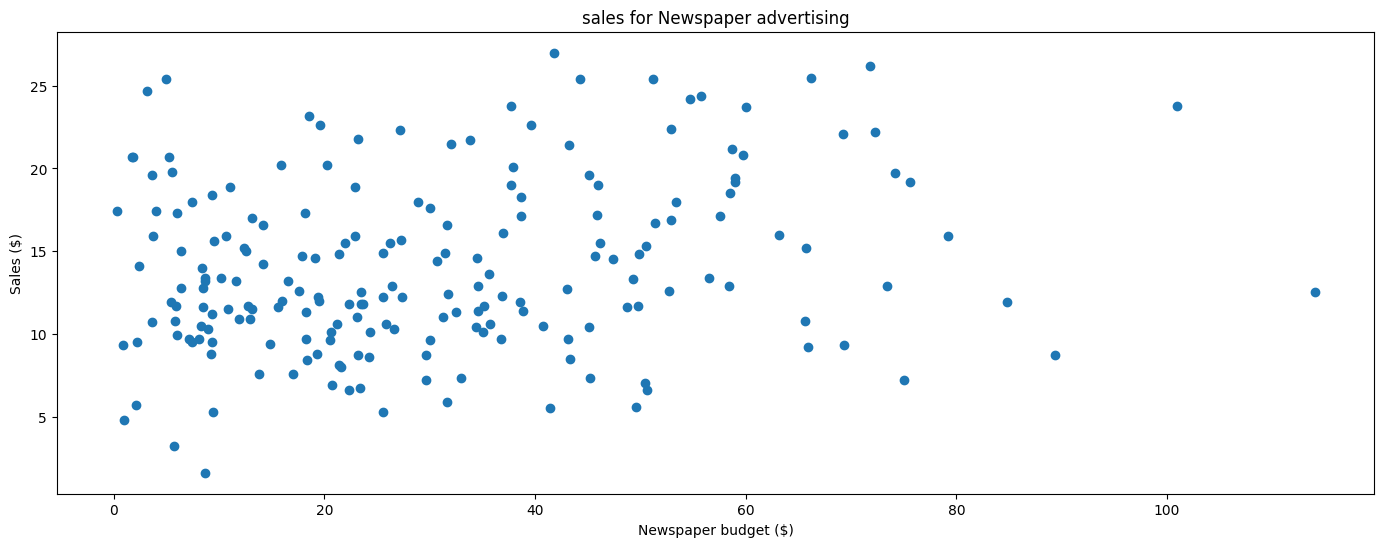

In [11]:
plt.figure(figsize=(17, 6))
plt.title('sales for Newspaper advertising')
plt.xlabel('Newspaper budget ($)')
plt.ylabel('Sales ($)')
plt.scatter(x=advertising_data.Newspaper, y=advertising_data.Sales)

## Implementing the model using sklearn

### Split  data into training set and validation set

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Choose the features
features_columns = ['TV', 'Radio', 'Newspaper']

y = advertising_data.Sales
X = advertising_data[features_columns]

# Splitting the dataset into the Training set and Test set
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3)

### Choose a model

In [17]:
# Specify Model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# predictions of the model
predictions = model.predict(X_valid)

In [18]:
# Create dataframe with the validations values
adverstising_data_with_prediction = advertising_data.loc[y_valid.index.tolist(), :]

# add the predictions to the dataframe
adverstising_data_with_prediction['Predicted'] = predictions

# Take a look at the dataframe
adverstising_data_with_prediction.head()

,TV,Radio,Newspaper,Sales,Predicted
148,243.2,49.0,44.3,25.4,23.398005
78,120.5,28.5,14.2,14.2,13.738708
166,234.5,3.4,84.8,11.9,14.502444
22,237.4,5.1,23.5,12.5,14.798106
31,292.9,28.3,43.2,21.4,21.808499


In [19]:
# Print the bias and weights
print(model.intercept_)
print(model.coef_)

2.7153318334399295
[0.04658842 0.18850634 0.00260858]


### Visualising the result

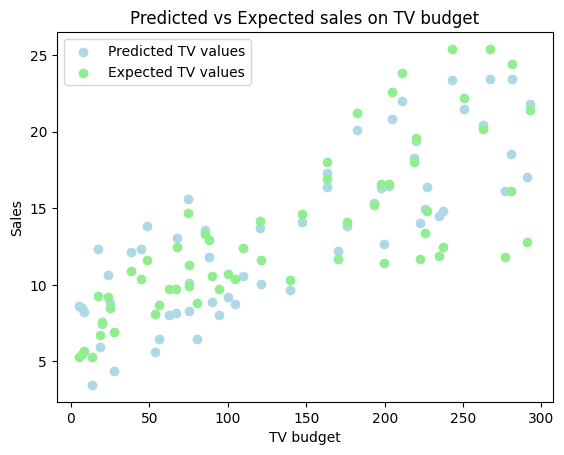

In [20]:
# Plot the predicted and expected values
plt.scatter(adverstising_data_with_prediction.TV, adverstising_data_with_prediction.Predicted, label='Predicted TV values', color='lightblue')
plt.scatter(adverstising_data_with_prediction.TV, adverstising_data_with_prediction.Sales, label='Expected TV values', color='lightgreen')

# Add labels and title
plt.xlabel('TV budget')
plt.ylabel('Sales')
plt.title('Predicted vs Expected sales on TV budget')

# Add legend
plt.legend()

# Show BOOM
plt.show()

### Model validation

I'm going to use the mean absolute error to verify the performance of the model.

In [21]:
from sklearn.metrics import mean_absolute_error

# Compute the mean absolute error
mean_absolute_error(adverstising_data_with_prediction.Sales, adverstising_data_with_prediction.Predicted)

1.4704454277775496

We can see that the model is good enough

## Implementing  my own model


The goal is to find the best fit straight line. Based on the given data points, we attempt to plot a line that fits the points the best.

In the dataset we have 3 features (TV budget, Radio budget, Newspaper budget). Then, the goal is to find out the line which follows the equation:

ŷi = β1X1i + β2X2i + β3X3i + b

We can rewrite this formula, considering β = \[β1, β2, β3] and X = the matrices of the features:

ŷi = βXi + b

### Normalizing the data

In [22]:
X=advertising_data[['TV','Radio','Newspaper']]
y=advertising_data['Sales']
y=np.array((y-y.mean())/y.std())
X=X.apply(lambda p:(p-p.mean())/p.std(),axis=0)

### Bias and weights

First, we generate randomly the bias and the weigth (between 0 and 1) for our model

In [23]:
# Generate random bias and weights
def Initialize():
    b = np.random.uniform(0, 1)
    β = np.random.uniform(0, 1, size=3)
    return β, b

β, b  = Initialize()
print(b)
print(β)

0.4431754361745749
[0.70544893 0.4192726  0.05413679]


### Calculate output

We are going to create a function to calculate the output (predicted values) using the following formula : yi = β1X1i + β2X2i + β3X3i + b

In [24]:
# Method to generate predicted values
def GeneratePredict(X, β, b):
    y_res = np.dot(X,β) + b
    return y_res

print(GeneratePredict(X, β, b))

[ 1.63220480e+00  8.96153803e-02  1.11835381e-01  1.05860451e+00
  4.37791447e-01  1.40881066e-01 -4.08181561e-02  7.20289500e-02
 -1.36551604e+00  2.69872869e-01 -7.30891108e-01  9.53882294e-01
 -1.47376303e-01 -4.64309276e-01  1.22252184e+00  1.58613807e+00
  3.76089576e-01  2.07125017e+00 -3.04958319e-01  4.34779765e-01
  1.21156959e+00  6.55142426e-01 -8.17199109e-01  9.20311926e-01
 -5.84749702e-01  8.09544405e-01  5.34963734e-01  1.00341937e+00
  1.36860082e+00 -3.64604401e-01  1.81531181e+00  1.70343172e-02
 -5.82362083e-01  1.24996148e+00 -6.53689862e-01  1.02757245e+00
  1.94443644e+00  6.24477980e-01 -3.02568846e-01  1.51965458e+00
  8.74236659e-01  9.95819765e-01  1.70120848e+00  5.04929838e-01
 -4.58328176e-01  6.54495156e-01 -3.92604044e-01  1.69118844e+00
  9.39122428e-01 -5.26381375e-01  3.17302235e-01 -3.92949463e-01
  1.55619101e+00  1.45302039e+00  1.51342205e+00  1.68055381e+00
 -5.41534782e-01  2.04631012e-01  1.72854915e+00  1.08950915e+00
 -9.48694905e-01  1.99090

### Cost function

Now we want to calculate the cost function (function to minimize). Here, the cost function can be written as:

J =  (1/n) * Σ<i,n> (ŷ - y)²

with J = cost function,
    n = number of element in the dataset,
    ŷ = predicted values,
    y = expected values

In [25]:
#define a method to compute the cost function
def Cost(y, y_pred):
    n = len(y)
    J = np.sum(np.power(y_pred - y, 2)) / n
    return J

print(Cost(y, GeneratePredict(X, β, b)))

0.31347239301059054


### Update bias and weights

We want to update the bias and weights to minimize the cost function. To do so we will use the partial derivative.

In [26]:
# method to update bias and weights to minimize the cost function
# a is the learning rate
def UpdateBiasWeights(X, y, y_pred, b, β, a):
    # partial derivative of dJ/db
    db=(np.sum(y_pred-y)*2)/len(y)
    
    # partial derivative of dJ/dβ
    dw=(np.dot((y_pred-y),X)*2)/len(y)
    
    # updates values
    β = β - a * dw
    b = b - a * db
    return β, b


print('Before updating')
print('bias: ',  b)
print('weights: ', β)
print()
y_predi = GeneratePredict(X, β, b)
β , b = UpdateBiasWeights(X, y, y_predi, b, β, 0.01)
print('After updating')
print('bias: ',  b)
print('weights: ', β)

Before updating
bias:  0.4431754361745749
weights:  [0.70544893 0.4192726  0.05413679]

After updating
bias:  0.4343119274510834
weights:  [0.70645844 0.421245   0.0538529 ]


### Implementing the gradient descent

Now we are going to use all the methods defined before to implement the gradient descent method


In [27]:
def GradientDescent(X, y, learning_rate, nb_iterations):
    # Initialize random bias and weights
    β, b = Initialize()
    
    for _ in range(nb_iterations):
        # generate a prediction
        y_pred = GeneratePredict(X, β, b)
        
        # keep in track previous values
        prev_b = b
        prev_β = β
        
        #update the bias and the weights
        β , b = UpdateBiasWeights(X, y, y_pred, prev_b, prev_β, learning_rate)
        
    return β , b

# Test the solution
final_β, final_b  = GradientDescent(X, y, learning_rate=0.01, nb_iterations=200)
print(final_b)
print(final_β)

0.014255470076503036
[0.7459806  0.5013331  0.03334489]


### Use bias and weights to predict values

In [33]:
# create a dataframe with the predictions made
def CreateDfPredictions(β , b):
    # copy the dataframe with the rights index
    df = advertising_data.loc[y_valid.index.tolist(), :]
    
    # Get the features budget matrices
    X_TV = df.iloc[:, [0]].values
    X_Radio = df.iloc[:, [1]].values
    X_Newspaper = df.iloc[:, [2]].values
    
    # Add the prediction column
    df['Prediction'] = X_TV * β[0] + X_Radio * β[1] + X_Newspaper * β[2] + b
    return df

df_pred = CreateDfPredictions(final_β, final_b)
df_pred.head()

,TV,Radio,Newspaper,Sales,Prediction
148,243.2,49.0,44.3,25.4,60.579003
78,120.5,28.5,14.2,14.2,33.204313
166,234.5,3.4,84.8,11.9,26.388034
22,237.4,5.1,23.5,12.5,24.557862
31,292.9,28.3,43.2,21.4,48.194884


We can see that the predictions are pretty bad. We can play with the number of iterations and the learning rate to find out better bias and weights.


In [30]:
final_β, final_b  = GradientDescent(X, y, learning_rate=0.0001, nb_iterations=300)
print(final_b)
print(final_β)

df_pred = CreateDfPredictions(final_β, final_b)
df_pred.head()

0.6104010480340043
[0.07855732 0.78394071 0.05531301]


,TV,Radio,Newspaper,Sales,Prediction
148,243.2,49.0,44.3,25.4,60.579003
78,120.5,28.5,14.2,14.2,33.204313
166,234.5,3.4,84.8,11.9,26.388034
22,237.4,5.1,23.5,12.5,24.557862
31,292.9,28.3,43.2,21.4,48.194884


We can see that the predictions are much better by adding more steps and put a lower learning_rate

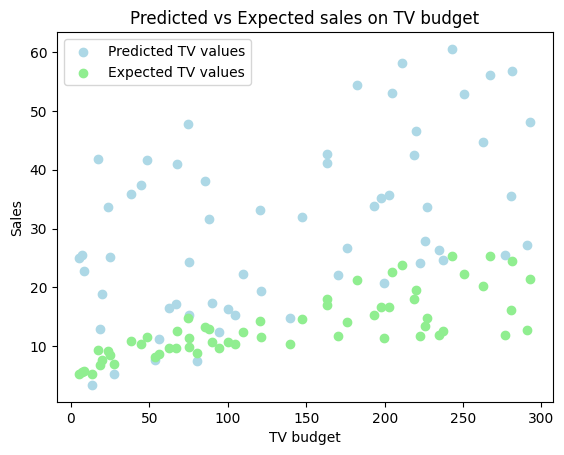

In [31]:
# Plot the predicted and expected values
plt.scatter(adverstising_data_with_prediction.TV, df_pred.Prediction, label='Predicted TV values', color='lightblue')
plt.scatter(adverstising_data_with_prediction.TV, df_pred.Sales, label='Expected TV values', color='lightgreen')

# Add labels and title
plt.xlabel('TV budget')
plt.ylabel('Sales')
plt.title('Predicted vs Expected sales on TV budget')

# Add legend
plt.legend()

# Show BOOM
plt.show()


## Conclusion

In this notebook, I have used Linear Regression to predict the sales of a product based on its TV, Radio and Newspaper budget.

    . First I used the LinearRegression model from the sklearn library that gave me very good result.
    . Secondly I have implemented my own model with a gradient descent algorithm.
    
The results were clearly better with the sklearn libraryand linear regression which is very simple to use. So except for a very specific need it is preferable to use a library already implemented
